In [ ]:
!pip install arch yfinance
!pip install arch statsmodels

In [ ]:
# ============================================================
# EGARCH Regime Detection (Single Stock, Plotly, Zoomable)
# ============================================================

import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from arch import arch_model

# ------------------------------------------------------------
# 1. Download data
# ------------------------------------------------------------
TICKER = "HDFCBANK.NS"
START_DATE = "2010-01-01"

df = yf.download(TICKER, start=START_DATE, progress=False)

# Robust Close selection
if isinstance(df.columns, pd.MultiIndex):
    close = df["Close"].iloc[:, 0]
else:
    close = df["Adj Close"] if "Adj Close" in df.columns else df["Close"]

df = pd.DataFrame({"Close": close}).dropna()

# ------------------------------------------------------------
# 2. Log returns
# ------------------------------------------------------------
df["logret"] = np.log(df["Close"] / df["Close"].shift(1))
df = df.dropna()

# ------------------------------------------------------------
# 3. Fit EGARCH(1,1,1)
# ------------------------------------------------------------
egarch = arch_model(
    df["logret"] * 100,
    mean="Constant",
    vol="EGARCH",
    p=1, o=1, q=1,
    dist="skewt"
)

res = egarch.fit(disp="off")

df["cond_vol"] = res.conditional_volatility / 100

# ------------------------------------------------------------
# 4. Additional features
# ------------------------------------------------------------
df["cummax"] = df["Close"].cummax()
df["drawdown"] = (df["Close"] - df["cummax"]) / df["cummax"]
df["mom20"] = df["Close"].pct_change(20)
df["vol_trend"] = df["cond_vol"] - df["cond_vol"].rolling(20).mean()

df = df.dropna()

# ------------------------------------------------------------
# 5. Regime rules
# ------------------------------------------------------------
high_vol = df["cond_vol"].quantile(0.75)

def detect_regime(r):
    if r["mom20"] > 0 and r["drawdown"] > -0.10 and r["cond_vol"] <= high_vol:
        return "Bull"
    if r["cond_vol"] >= high_vol and (
        r["drawdown"] <= -0.12 or r["mom20"] < 0 or r["vol_trend"] > 0
    ):
        return "Bear"
    return "Neutral"

df["regime"] = df.apply(detect_regime, axis=1)

print("\nRegime counts:")
print(df["regime"].value_counts())

# ------------------------------------------------------------
# 6. Plotly zoomable plot
# ------------------------------------------------------------
fig = go.Figure()

# Price line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df["Close"],
    name="Price",
    line=dict(color="black", width=1),
    hovertemplate="Date: %{x}<br>Price: %{y:.2f}<extra></extra>"
))

# Regime coloring
colors = {"Bull": "green", "Neutral": "orange", "Bear": "red"}

for regime, color in colors.items():
    mask = df["regime"] == regime
    fig.add_trace(go.Scatter(
        x=df.index[mask],
        y=df["Close"][mask],
        mode="markers",
        name=regime,
        marker=dict(color=color, size=5),
        hovertemplate=f"{regime}<br>Date: %{{x}}<br>Price: %{{y:.2f}}<extra></extra>"
    ))

fig.update_layout(
    title=f"{TICKER} – EGARCH Regime Detection (Zoomable)",
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode="x unified",
    template="plotly_white",
    legend=dict(orientation="h", yanchor="bottom", y=1.02)
)

fig.show()


/tmp/ipython-input-2084974530.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START_DATE, progress=False)



Regime counts:
regime
Bull       1823
Neutral    1266
Bear        829
Name: count, dtype: int64


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: RELIANCE.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: HDFCBANK.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: ICICIBANK.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: INFY.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: SBIN.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: TCS.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: ITC.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: KOTAKBANK.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: LT.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: AXISBANK.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: HINDUNILVR.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: BHARTIARTL.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: ASIANPAINT.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: MARUTI.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: M&M.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: HCLTECH.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: ULTRACEMCO.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: TITAN.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: WIPRO.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: NTPC.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: POWERGRID.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: SUNPHARMA.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: NESTLEIND.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: BAJFINANCE.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: BAJAJFINSV.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: ADANIENT.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: ADANIPORTS.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: JSWSTEEL.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: TATASTEEL.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: TATAMOTORS.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: ONGC.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: COALINDIA.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: GRASIM.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: SBILIFE.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: HDFCLIFE.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: BRITANNIA.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: CIPLA.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: DRREDDY.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: EICHERMOT.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: HEROMOTOCO.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: HINDALCO.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: TECHM.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: APOLLOHOSP.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: DIVISLAB.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: BAJAJ-AUTO.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: BPCL.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: INDUSINDBK.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: SHREECEM.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: UPL.NS


/tmp/ipython-input-2889792192.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, progress=False)


OK: TATACONSUM.NS

CAGR: 23.93%
Sharpe: 1.37
Max Drawdown: -19.59%


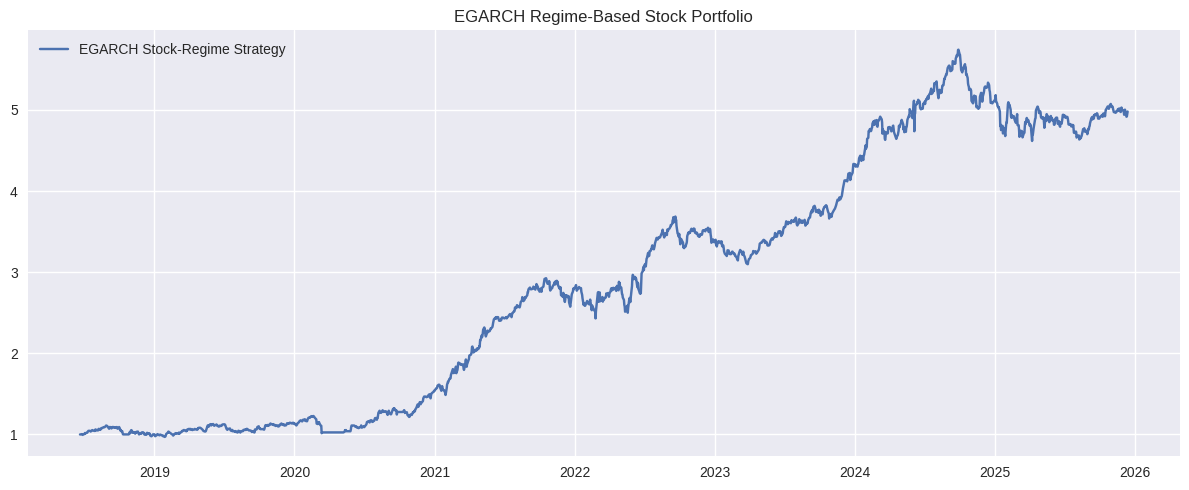

In [ ]:
# ============================================================
# EGARCH Regime-Based Stock-Only Portfolio (No Index Filter)
# ============================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

START_DATE = "2012-01-01"

# ============================================================
# 1. Robust Close Downloader
# ============================================================
def download_close_series(ticker, start=START_DATE):
    df = yf.download(ticker, start=start, progress=False)
    if df.empty:
        raise ValueError(f"No data for {ticker}")

    if isinstance(df.columns, pd.MultiIndex):
        close_cols = [c for c in df.columns if str(c[0]).lower() == "close"]
        series = df[close_cols[0]]
        if isinstance(series, pd.DataFrame):
            series = series.iloc[:, 0]
    else:
        series = df["Adj Close"] if "Adj Close" in df.columns else df["Close"]

    series = series.dropna()
    series.name = "Close"
    return series


# ============================================================
# 2. EGARCH Feature Builder
# ============================================================
def compute_egarch_features(close, mom_window=20, vol_trend_win=20):
    df = pd.DataFrame({"Close": close})
    df["logret"] = np.log(df["Close"] / df["Close"].shift(1))
    df = df.dropna()

    model = arch_model(
        df["logret"] * 100,
        mean="Constant",
        vol="EGARCH",
        p=1, o=1, q=1,
        dist="skewt"
    )
    res = model.fit(disp="off")

    df["cond_vol"] = res.conditional_volatility / 100
    df["cummax"] = df["Close"].cummax()
    df["drawdown"] = (df["Close"] - df["cummax"]) / df["cummax"]
    df["mom20"] = df["Close"].pct_change(mom_window)
    df["vol_trend"] = df["cond_vol"] - df["cond_vol"].rolling(vol_trend_win).mean()

    df = df.dropna()
    return df


# ============================================================
# 3. Regime Detection + Smoothing
# ============================================================
def assign_regimes(df):
    high_thr = df["cond_vol"].quantile(0.75)

    def detect(row):
        v, m, vt, dd = row["cond_vol"], row["mom20"], row["vol_trend"], row["drawdown"]

        if (m > 0) and (dd > -0.10) and (v <= high_thr):
            return "Bull"
        if (v >= high_thr) and (dd <= -0.12 or m < 0 or vt > 0):
            return "Bear"
        return "Neutral"

    df["regime_raw"] = df.apply(detect, axis=1)

    def smooth(series, persist=2):
        s = series.reset_index(drop=True)
        out = s.copy()
        for i in range(1, len(s)):
            if s[i] != s[i-1]:
                window = s[i:i+persist]
                if (window == s[i]).sum() < persist:
                    out[i] = s[i-1]
        out.index = series.index
        return out

    df["regime"] = smooth(df["regime_raw"], persist=2)
    return df


# ============================================================
# 4. Universe (NIFTY50)
# ============================================================
NIFTY50 = [
    "RELIANCE.NS","HDFCBANK.NS","ICICIBANK.NS","INFY.NS","SBIN.NS",
    "TCS.NS","ITC.NS","KOTAKBANK.NS","LT.NS","AXISBANK.NS",
    "HINDUNILVR.NS","BHARTIARTL.NS","ASIANPAINT.NS","MARUTI.NS","M&M.NS",
    "HCLTECH.NS","ULTRACEMCO.NS","TITAN.NS","WIPRO.NS","NTPC.NS",
    "POWERGRID.NS","SUNPHARMA.NS","NESTLEIND.NS","BAJFINANCE.NS","BAJAJFINSV.NS",
    "ADANIENT.NS","ADANIPORTS.NS","JSWSTEEL.NS","TATASTEEL.NS","TATAMOTORS.NS",
    "ONGC.NS","COALINDIA.NS","GRASIM.NS","SBILIFE.NS","HDFCLIFE.NS",
    "BRITANNIA.NS","CIPLA.NS","DRREDDY.NS","EICHERMOT.NS","HEROMOTOCO.NS",
    "HINDALCO.NS","TECHM.NS","APOLLOHOSP.NS","DIVISLAB.NS","BAJAJ-AUTO.NS",
    "BPCL.NS","INDUSINDBK.NS","SHREECEM.NS","UPL.NS","TATACONSUM.NS",
]

# ============================================================
# 5. Compute Stock Data
# ============================================================
stock_data = {}

for t in NIFTY50:
    try:
        close = download_close_series(t)
        df_t = compute_egarch_features(close)
        df_t = assign_regimes(df_t)

        # factors
        c = df_t["Close"]
        df_t["ret_1m"] = c.pct_change(21)
        df_t["ret_3m"] = c.pct_change(63)
        df_t["ret_6m"] = c.pct_change(126)
        df_t["vol_60"] = df_t["logret"].rolling(60).std()

        stock_data[t] = df_t.dropna()
        print("OK:", t)
    except Exception as e:
        print("FAILED:", t, e)


# ============================================================
# 6. Align Dates
# ============================================================
common_idx = None
for t in stock_data:
    common_idx = stock_data[t].index if common_idx is None else common_idx.intersection(stock_data[t].index)

for t in stock_data:
    stock_data[t] = stock_data[t].loc[common_idx]


# ============================================================
# 7. Weekly Rebalancing
# ============================================================
rebals = pd.Series(index=common_idx, data=1).resample("W-FRI").last().index
rebals = rebals[rebals.isin(common_idx)]

weights_hist = {}

for d in rebals:
    rows = {t: stock_data[t].loc[d] for t in stock_data}
    bull = [t for t,r in rows.items() if r["regime"] == "Bull"]
    neutral = [t for t,r in rows.items() if r["regime"] == "Neutral"]

    if len(bull) >= 15:
        selected = bull
    elif len(bull) > 0:
        selected = bull
    else:
        weights_hist[d] = {}
        continue

    scores = {}
    for t in selected:
        r = rows[t]
        mom = 0.5*r["ret_1m"] + 0.3*r["ret_3m"] + 0.2*r["ret_6m"]
        vol = r["vol_60"]
        if pd.notna(mom) and pd.notna(vol) and vol > 0:
            scores[t] = max(mom/vol, 0)

    total = sum(scores.values())
    weights_hist[d] = {t: s/total for t,s in scores.items()} if total > 0 else {}


# ============================================================
# 8. Backtest
# ============================================================
rets = pd.DataFrame({t: stock_data[t]["logret"] for t in stock_data})
simple = np.exp(rets) - 1

W = pd.DataFrame(0.0, index=common_idx, columns=rets.columns)

rdates = sorted(weights_hist.keys())
for i,d in enumerate(rdates):
    end = rdates[i+1] if i < len(rdates)-1 else common_idx[-1]
    idx = common_idx[(common_idx > d) & (common_idx <= end)]
    for t,w in weights_hist[d].items():
        W.loc[idx,t] = w

port_ret = (W * simple).sum(axis=1)
equity = (1 + port_ret.fillna(0)).cumprod()


# ============================================================
# 9. Metrics
# ============================================================
years = (equity.index[-1] - equity.index[0]).days / 365
cagr = equity.iloc[-1]**(1/years) - 1

sharpe = np.sqrt(252) * port_ret.mean() / port_ret.std()

dd = equity / equity.cummax() - 1
max_dd = dd.min()

print(f"\nCAGR: {cagr:.2%}")
print(f"Sharpe: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd:.2%}")


# ============================================================
# 10. Plot
# ============================================================
plt.figure(figsize=(12,5))
plt.plot(equity, label="EGARCH Stock-Regime Strategy")
plt.legend()
plt.grid(True)
plt.title("EGARCH Regime-Based Stock Portfolio")
plt.tight_layout()
plt.show()